In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [2]:
# cria base de dados
dados = pd.DataFrame({
    'Teor Alcoólico':[3,4,5,6],
    'Acidez':["muito", "pouco", "médio", "baixo"],
    'pH':[4.3,2.8,4.2,3.9],
})

In [3]:
dados.head()

,Teor Alcoólico,Acidez,pH
0,3,muito,4.3
1,4,pouco,2.8
2,5,médio,4.2
3,6,baixo,3.9


In [4]:
dados = pd.get_dummies(dados, columns=['Acidez'])

In [5]:
dados

,Teor Alcoólico,pH,Acidez_baixo,Acidez_muito,Acidez_médio,Acidez_pouco
0,3,4.3,False,True,False,False
1,4,2.8,False,False,False,True
2,5,4.2,False,False,True,False
3,6,3.9,True,False,False,False


In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dados)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [7]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [8]:
sse = kmeans.inertia_
print('SSE: ',sse)

SSE:  1.545


In [9]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0, 0.5, 'Teor Alcoólico')

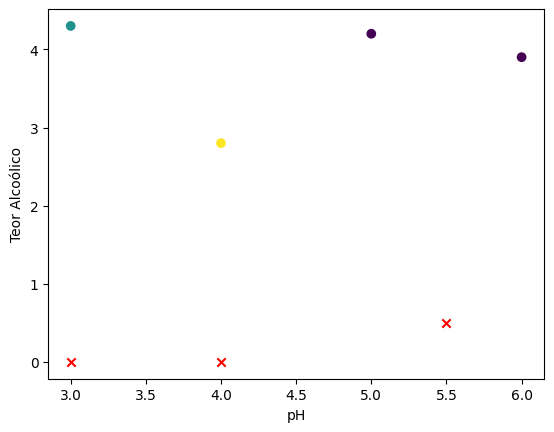

In [12]:
plt.scatter(dados['Teor Alcoólico'],dados['pH'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 0], centroids[:, 2], marker='x', color='red')

plt.xlabel("pH")
plt.ylabel("Teor Alcoólico")

In [13]:
print(labels)
print(centroids)

[1 2 0 0]
[[5.5  4.05 0.5  0.   0.5  0.  ]
 [3.   4.3  0.   1.   0.   0.  ]
 [4.   2.8  0.   0.   0.   1.  ]]


In [14]:
print(dados)

   Teor Alcoólico   pH  Acidez_baixo  Acidez_muito  Acidez_médio  Acidez_pouco
0               3  4.3         False          True         False         False
1               4  2.8         False         False         False          True
2               5  4.2         False         False          True         False
3               6  3.9          True         False         False         False


In [15]:
dados

,Teor Alcoólico,pH,Acidez_baixo,Acidez_muito,Acidez_médio,Acidez_pouco
0,3,4.3,False,True,False,False
1,4,2.8,False,False,False,True
2,5,4.2,False,False,True,False
3,6,3.9,True,False,False,False


In [16]:
dados['Grupo'] = labels
grouped_data = dados.groupby('Grupo').mean()
print(grouped_data)

       Teor Alcoólico    pH  Acidez_baixo  Acidez_muito  Acidez_médio  \
Grupo                                                                   
0                 5.5  4.05           0.5           0.0           0.5   
1                 3.0  4.30           0.0           1.0           0.0   
2                 4.0  2.80           0.0           0.0           0.0   

       Acidez_pouco  
Grupo                
0               0.0  
1               0.0  
2               1.0  
